# Map Demo

This demo is designed to show the difference in resolution and scope
between the geometries returned by `censusdis.maps.ShapeReader.read_shapefile`
and `censusdis.maps.ShapeReader.read_cb_shapefile`. The former returns 
high-resolution geometry focused on political boundaries that is useful for
spatial joins. The latter returns 
lower resolution cartographic boundary geometries suitable for plotting maps.

## Imports and configuration

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)

In [2]:
import os

from collections import OrderedDict

import matplotlib.pyplot as plt

from censusdis.states import STATE_NJ, STATE_NAMES_FROM_IDS
from censusdis.maps import ShapeReader

In [3]:
STATE = STATE_NJ
YEAR = 2010

## Read the geometries

We will read both files for a variety of geoemetries. Note that 
blocks are quite small so there is no separate cartographic 
bounds version available.

In [4]:
reader = ShapeReader(year=YEAR)

In [5]:
shapefiles_by_geo = OrderedDict()
for geo in ["tabblock", "bg", "tract", "cousub"]:
    gdf = reader.read_shapefile(STATE, geo)
    shapefiles_by_geo[geo] = gdf

In [6]:
cb_by_geo = {}
if YEAR >= 2010:
    for geo in ["bg", "tract", "cousub"]:
        gdf = reader.read_cb_shapefile(STATE, geo)
        cb_by_geo[geo] = gdf

### Counties

County files are available on a nationwide basis, so we will load them
that way and then filter down to just the state we want.

In [7]:
gdf = reader.read_shapefile("us", "county")
shapefiles_by_geo["county"] = gdf[gdf["STATEFP"] == STATE]

In [8]:
gdf_cb = reader.read_cb_shapefile("us", "county")
cb_by_geo["county"] = gdf_cb[gdf_cb["STATEFP"] == STATE]

## Plot

Now let's plot each geometrty side by side. You will see that the 
cartographic boundary versions still have plenty of detail to render
nice maps, and that they also don't extend out into bodies of water 
like the other versions do when, for example, a county, county subdivision,
or census tract includes water.

In [9]:
def plot(gdf, state, geo_name, ax):
    ax = gdf.boundary.plot(linewidth=1, ax=ax)

    state_name = STATE_NAMES_FROM_IDS[state]

    ax.set_title(f"{state_name}\n{YEAR} {geo_name}")

    ax.axis("off")

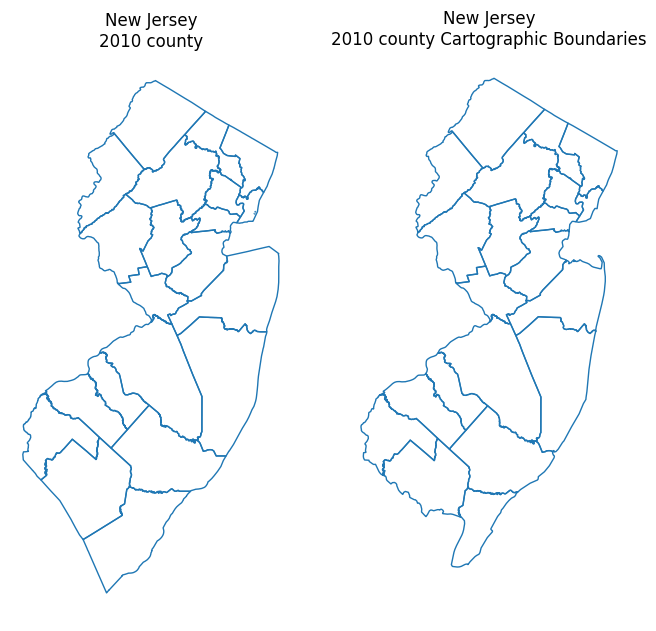

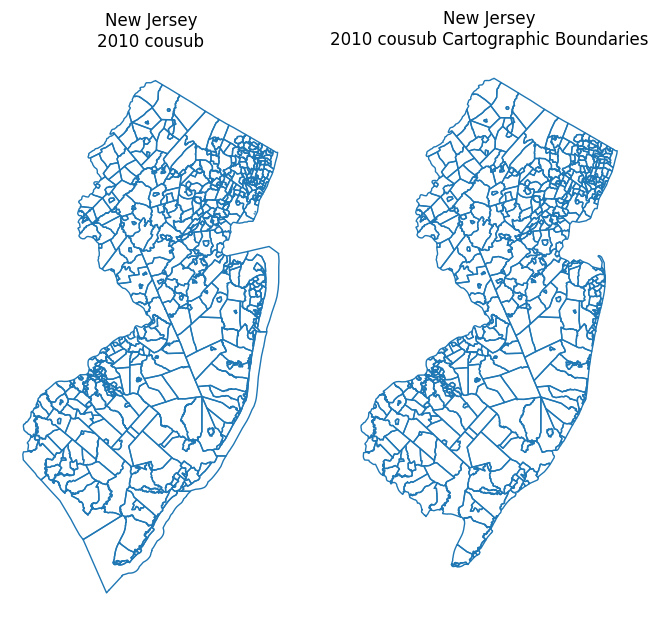

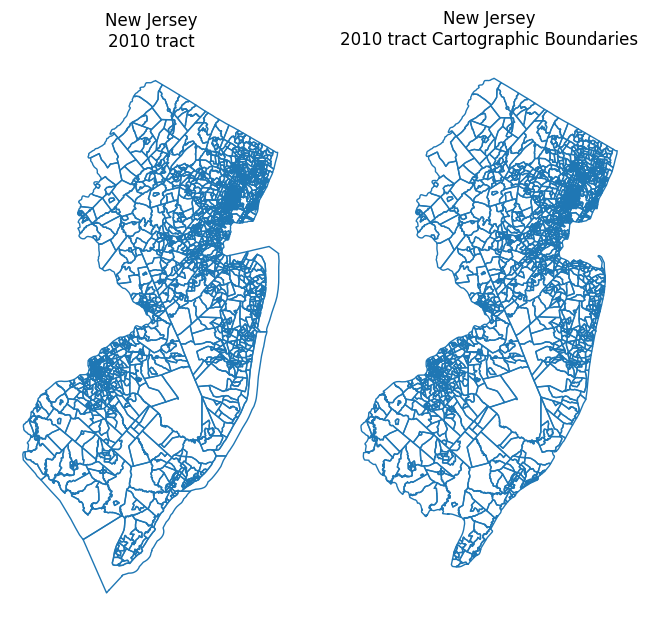

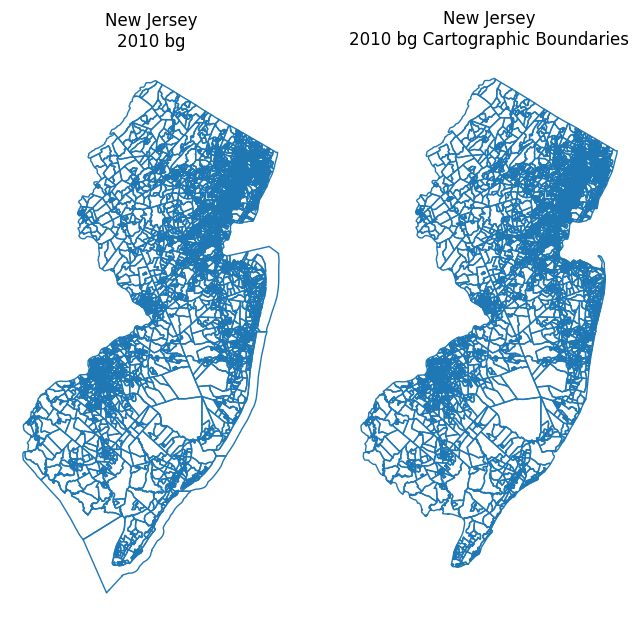

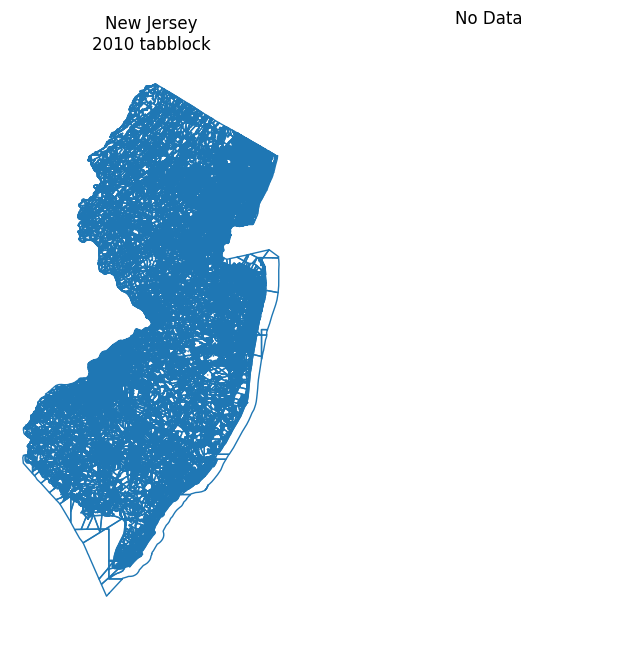

In [10]:
for geo, gdf_shape in reversed(shapefiles_by_geo.items()):
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 8))
    plot(gdf_shape, STATE, geo, axes[0])
    gdf_cb = cb_by_geo.get(geo, None)
    if gdf_cb is not None:
        plot(gdf_cb, STATE, f"{geo} Cartographic Boundaries", axes[1])
    else:
        axes[1].set_title("No Data")
        axes[1].axis("off")